Assumption: Independence of Errors

In linear regression, we assume that the residuals (errors) are independent of each other — that is, one error does not depend on another.
cov(ei,ej)=0 for i!=j
Each observation’s error should be random and unrelated to the others.

If the errors are correlated (autocorrelation), then the model is missing some systematic pattern in the data — meaning your regression line isn’t capturing all the structure.

/var/folders/dv/hsrvsn153lx15srhcq05crhh0000gn/T/ipykernel_16739/2853596422.py:44: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


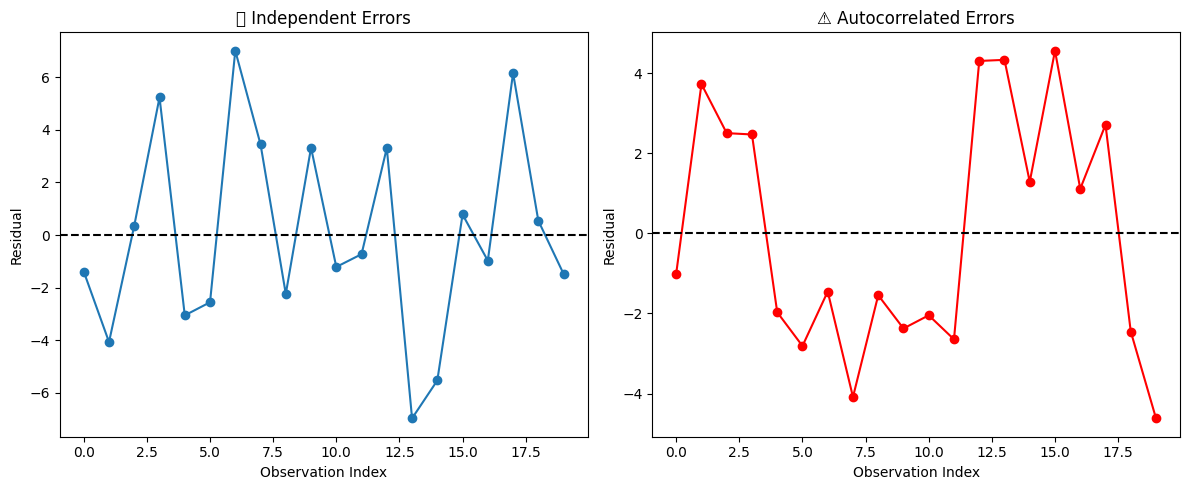

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ----- 1️⃣ Generate independent data -----
np.random.seed(42)
X = np.arange(1, 21).reshape(-1, 1)
y = 5 * X.squeeze() + np.random.normal(0, 5, size=20)  # random noise (independent)

# Fit linear regression
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
residuals_independent = y - y_pred

# ----- 2️⃣ Generate autocorrelated data -----
# Errors follow a pattern (previous error influences next)
errors = np.zeros(20)
for i in range(1, 20):
    errors[i] = 0.8 * errors[i-1] + np.random.normal(0, 3)
y_auto = 5 * X.squeeze() + errors

model2 = LinearRegression().fit(X, y_auto)
y_pred_auto = model2.predict(X)
residuals_autocorr = y_auto - y_pred_auto

# ----- 3️⃣ Plot both -----
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(residuals_independent, marker='o')
plt.title("✅ Independent Errors")
plt.xlabel("Observation Index")
plt.ylabel("Residual")
plt.axhline(0, color='black', linestyle='--')

plt.subplot(1,2,2)
plt.plot(residuals_autocorr, marker='o', color='r')
plt.title("⚠️ Autocorrelated Errors")
plt.xlabel("Observation Index")
plt.ylabel("Residual")
plt.axhline(0, color='black', linestyle='--')

plt.tight_layout()
plt.show()


Interpretation

Left plot (✅ Independent Errors):
The residuals are randomly scattered around zero — no visible pattern.
This satisfies the independence assumption.

Right plot (⚠️ Autocorrelated Errors):
Residuals follow an up-and-down wave-like trend.
This indicates autocorrelation, meaning the model systematically misses time-based structure.

🎯 What is VIF?

The Variance Inflation Factor (VIF) measures how much the variance (uncertainty) of a regression coefficient (β) is inflated because of multicollinearity — i.e., when predictor variables are correlated with each other.

🔍 In simple words:

VIF tells us how strongly one independent variable is correlated with the others.

If two or more predictors are correlated, they carry overlapping information, and the model can’t tell which one really affects the target.

That’s what multicollinearity means.
     VIF=(1/(1-Ri-squared))
📘 Interpretation
VIF value	Meaning	What to do
1	No correlation with other variables	✅ Ideal
1 – 5	Moderate correlation	⚠️ Usually acceptable
> 5	High correlation	🚨 Problematic — consider removing or combining variables
> 10	Severe multicollinearity	❌ Definitely problematic
📊 Example (Step-by-step intuition)

Suppose we have these predictors:

House Size	Number of Rooms	Price
1000	3	50,00,000
1500	4	65,00,000
2000	5	80,00,000
2500	6	95,00,000

Notice that size and number of rooms are highly correlated — larger houses usually have more rooms.

➡️ If you include both in regression, they both explain the same thing (house size).
➡️ The model will have trouble deciding which variable is really important — standard errors of β’s will increase.
➡️ That’s where VIF detects the issue.

🧠 Intuitive meaning

Let’s say a predictor has VIF = 9.
That means the variance of its coefficient is 9 times larger than it would be if that predictor were not correlated with others.

So, the higher the VIF → the more redundant (less reliable) that variable’s coefficient.

🧪 Python Example

Here’s how to calculate VIF in Python 👇

In [5]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example dataset
data = pd.DataFrame({
    'size': [1000, 1500, 2000, 2500, 3000],
    'rooms': [3, 4, 5, 6, 7],
    'age': [10, 8, 6, 4, 2]
})

# Add constant term for intercept
X = add_constant(data)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)


  Feature  VIF
0   const  0.0
1    size  inf
2   rooms  inf
3     age  inf


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


🧩 How to fix high VIF

Remove one of the correlated predictors (e.g., drop rooms or size).

Combine correlated variables into one (e.g., “house space index”).

Use dimensionality reduction like PCA (Principal Component Analysis).

Regularization techniques like Ridge Regression also help reduce multicollinearity impact.

In [1]:
from sklearn.datasets import load_iris
df=load_iris()
X=df.data
y=df.target

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282],
       [-1.10824606,  0.08570939, -1.27600637, -1.44608785],
       [-0.86445224,  1.65083742, -1.27600637, -1.17911778],
       [ 0.59831066,  0.53288883,  0.55777524,  0.55618763],
       [ 0.84210448, -0.

In [4]:
from  sklearn.svm import SVC
model=SVC(kernel="rbf")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)




In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy_score=>",accuracy_score(y_test,y_pred))
print("confusion_matrix=>",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score=> 1.0
confusion_matrix=> [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

